In [100]:
import arguebuf as ab
graph = ab.load.file("../data/graphs/microtexts/nodeset6363.json")
mj = [n for n in graph.nodes if len(graph.outgoing_nodes(n)) == 0][0]
major_claim = graph.nodes[mj]

In [101]:
def normalize(graph: ab.Graph) -> None:
    s_nodes = [n for n in graph.scheme_nodes.values()]
    for n in s_nodes:
        # scheme node refers to another scheme node instead of atom node
        incoming = graph.incoming_nodes(n)
        incoming_s_nodes = [node for node in incoming if isinstance(node, ab.SchemeNode)]
        incoming_i_nodes = [node for node in incoming if isinstance(node, ab.AtomNode)]
        if len(incoming_s_nodes) > 0:
            # find the s_node's edge to n
            s_node = incoming_s_nodes[0]
            edge = [e for e in graph.outgoing_edges(s_node)][0]
            # this edge should lead to the i-node beneath n
            graph.remove_edge(edge)
            graph.add_edge(ab.Edge(s_node, incoming_i_nodes[0]))
            print(f"normalized {s_node} -> {incoming_i_nodes}")
            print(f"n {n}")

normalize(graph)

normalized 119952 -> [AtomNode(119947, Patients do often report relief of their complaints after such treatments.)]
n 119951


In [102]:
class Node:
    def __init__(self, node, parent, x_pos, y_pos, width = 256):
        self.node = node
        self.parent = parent
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.width = width
    
    def __str__(self) -> str:
        return f"{self.node.id} ({self.node.label}) {self.y_pos} - {self.width}"

In [103]:
import queue
q = queue.Queue()
q.put(Node(major_claim, None, 0, 0))
nodes = []
while not q.empty():
    n = q.get()
    nodes.append(n)
    children = graph.incoming_nodes(n.node)
    for i, c in enumerate(children):
        width = n.width / len(children)
        q.put(Node(c, n, n.x_pos + i * width, n.y_pos + 1, width))
for n in nodes:
    print(n)
max_height = nodes[-1].y_pos+1
print(max_height)

119944 (Health insurance companies should not cover treatment in complementary medicine) 0 - 256
119951 (Attack) 1 - 128.0
119949 (Attack) 1 - 128.0
119947 (Patients do often report relief of their complaints after such treatments.) 2 - 128.0
119945 (unless the promised effect and its medical benefit have been concretely proven.) 2 - 128.0
119952 (Attack) 3 - 128.0
119950 (Attack) 3 - 128.0
119948 (But as long as it is unclear as to how this works, the funds should rather be spent on therapies where one knows with certainty.) 4 - 128.0
119946 (Yet this very proof is lacking in most cases.) 4 - 128.0
5


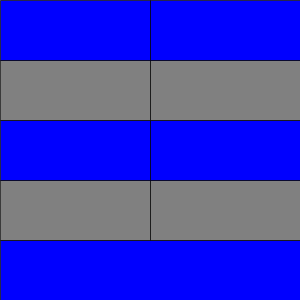

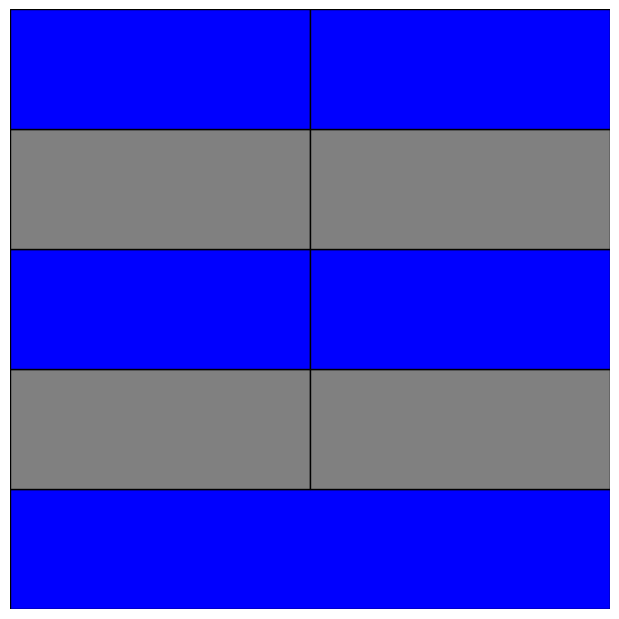

In [133]:
# draw
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

height = 256 / max_height

fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(0, 256)
ax.set_ylim(0, 256)
ax.set_aspect('equal')
for n in nodes:
    rand = random.random()
    ax.add_patch(patches.Rectangle((n.x_pos, n.y_pos * height), n.width, height, edgecolor='black', facecolor='blue' if isinstance(n.node, ab.AtomNode) else 'grey'))
    # ax.text(n.x_pos + n.width / 2, -n.y_pos + rand, n.node.label, ha='center', va='center')


ax.set_axis_off()
# remove white border
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig("graph.png", bbox_inches=0, pad_inches=0, dpi=50)
img = Image.open("graph.png")
img
# plt.show()

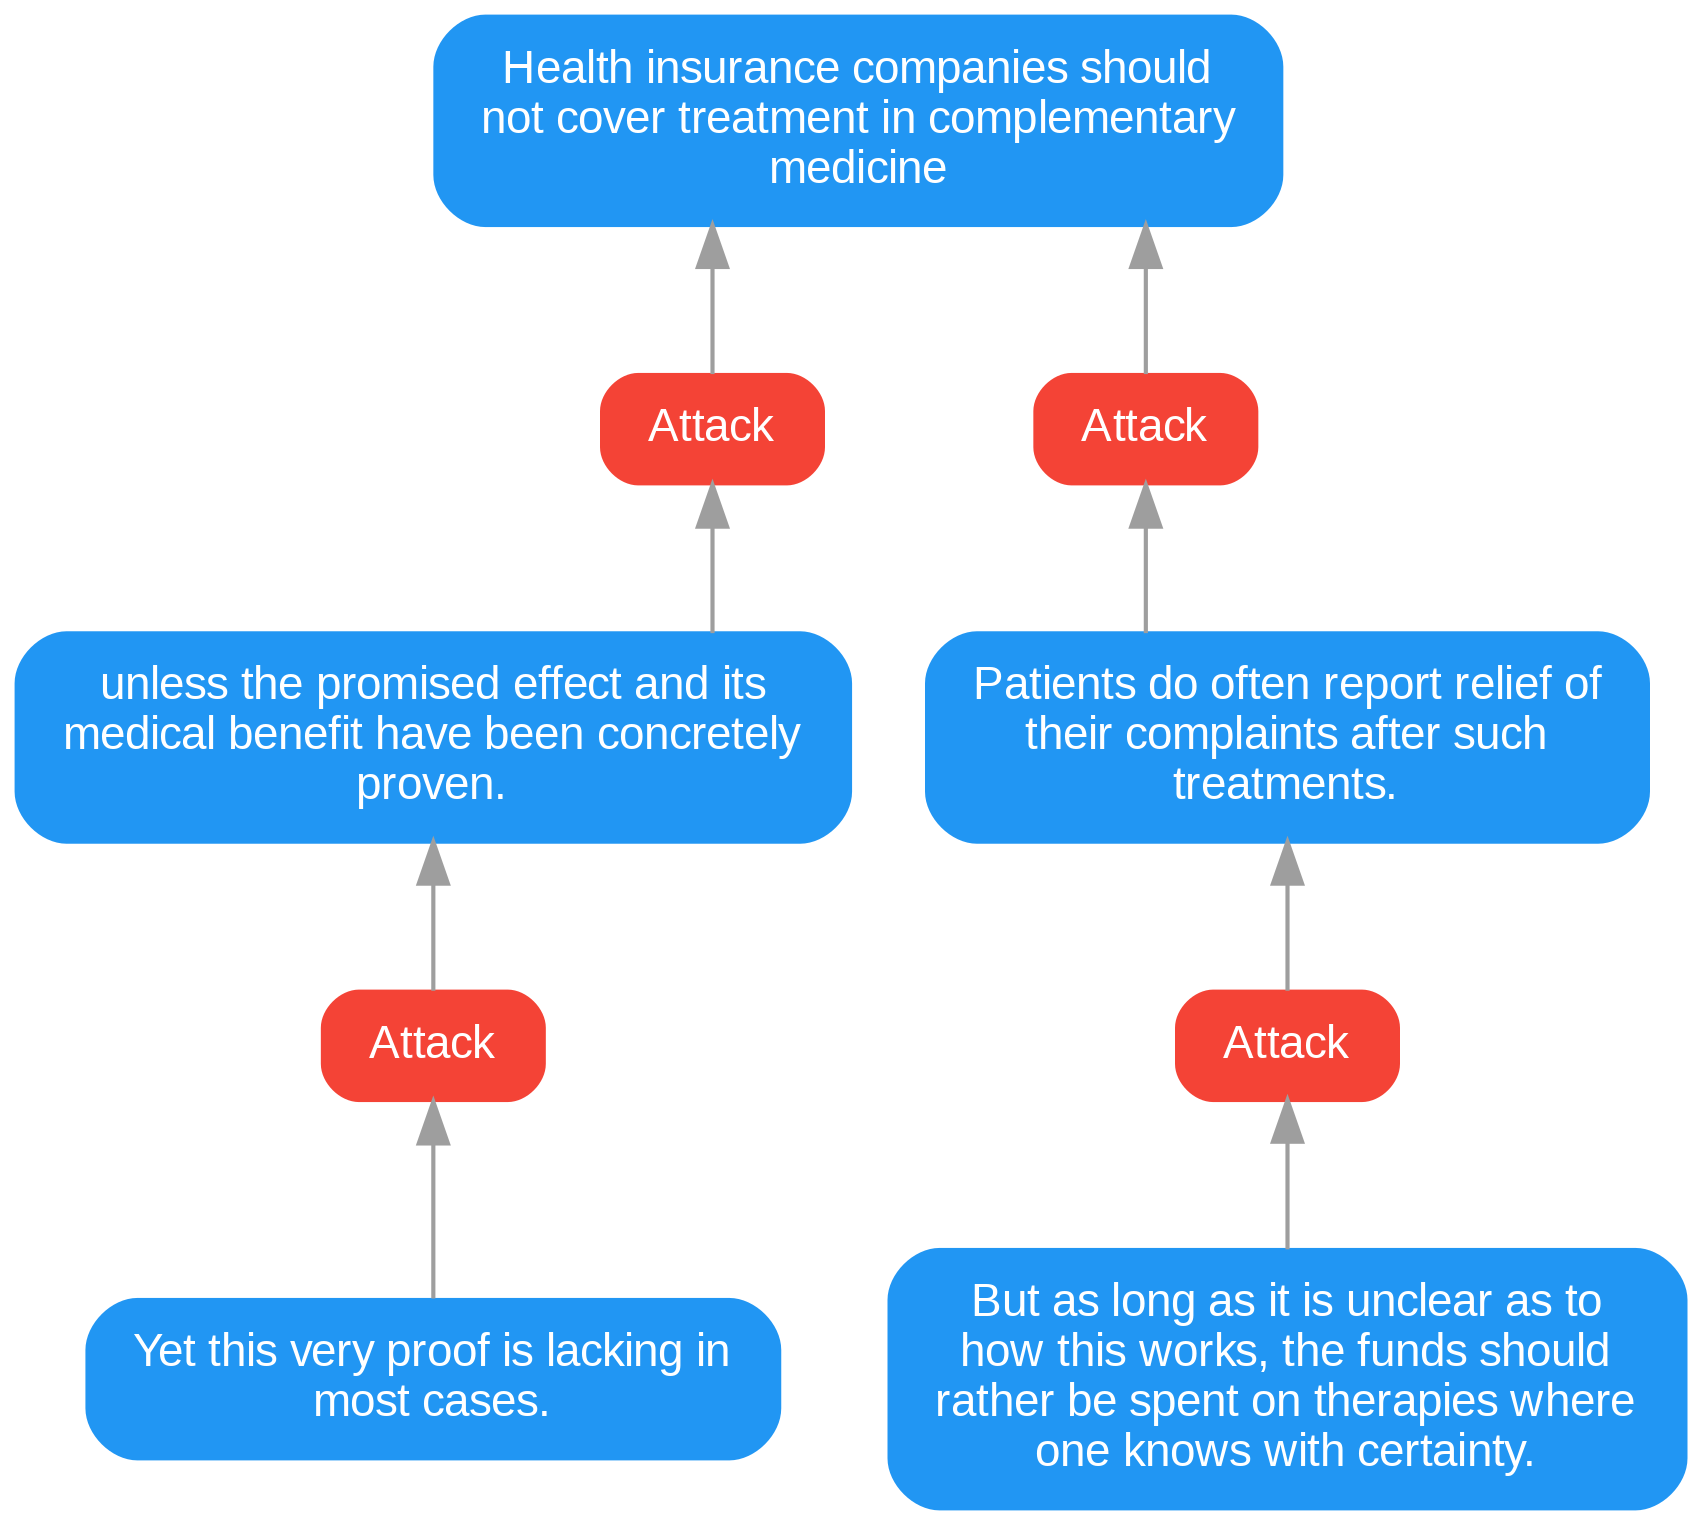

In [105]:
from PIL import Image
ab.render.graphviz(ab.dump.graphviz(graph), "graph.png")
img = Image.open("graph.png")
img